In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

In [102]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [103]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [104]:
df.shape

(158, 12)

As we have to predict the "Happiness Score", we are setting the same label as (y) and shifting to the last column for our further process.

In [105]:
label=df.pop('Happiness Score')

In [106]:
df.insert(11, 'Happiness Score', label)

In [107]:
df

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [108]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

In [109]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

In [110]:
df.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


Observations: (1) There is no null value in the above dataset.
(2) The Mean of the "Trust (Government Corruption)" 0.143 is greater than its Median (50% Percentile) 0.107, which means this column is Right Sided Skewed, rest are very nearby and very less skewed some where.
(3) In the "Happiness Rank" the difference between 75% (Percentile) 118.75 and Maximum Value 158.00 is high, so Outliers are their, rest columns are also having the same but little diferences, So Outliers possibilities are there.
(4) In many of the columns their are lager differences between Mean & Standard Deviation, so these are the spreaded data and not normally distributed.
(5) As our Target columns "Happiness Score" is the continuous data, we have to use Linear Regression models for prediction of this dataset.

In [111]:
dfcor=df.corr()

In [112]:
dfcor

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Happiness Rank,1.000000,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,-0.992105
Standard Error,0.158516,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.785267,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.733644,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.735613,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,-0.556886,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),-0.372315,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,-0.160142,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,-0.521999,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.992105,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


<AxesSubplot:>

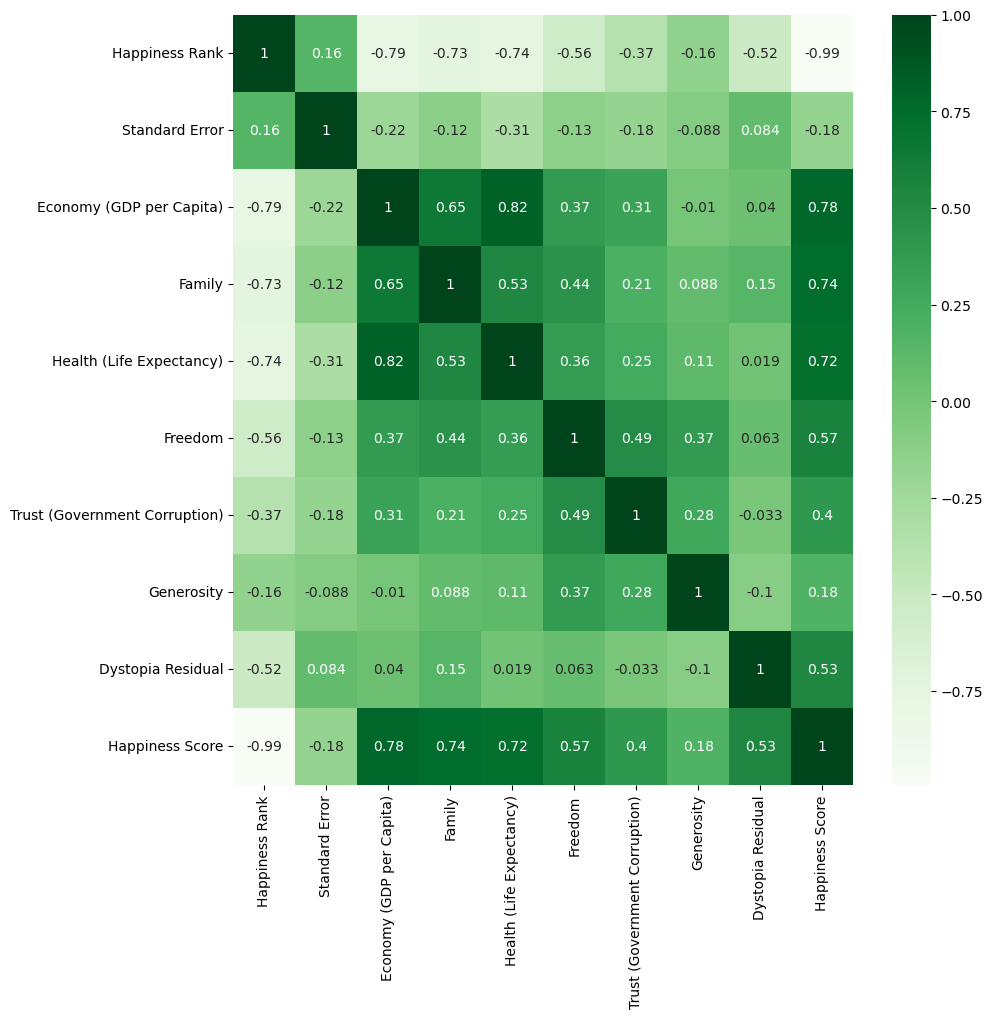

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,annot=True,cmap='Greens')

By the above Heatmap, we have considered that (1) "Generosity" and "Dystopia Residual" are negatively related.
(2) "Economy (GDP per Capita)" & "Family" and "Dystopia" & "Happness Score" are positively related.

In [114]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

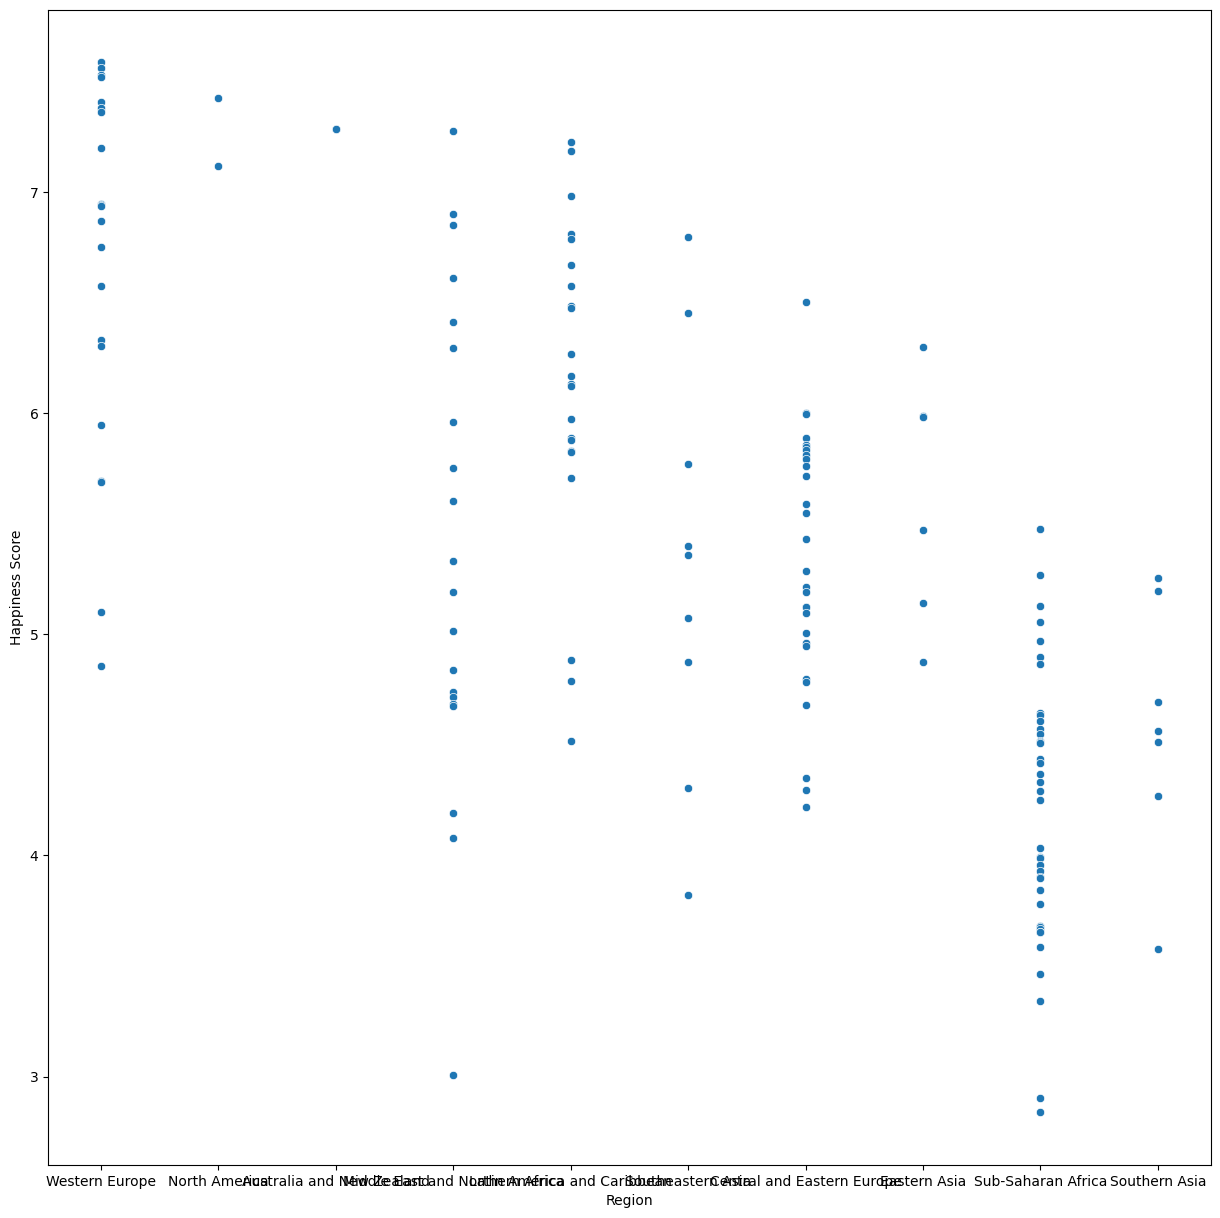

In [115]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Region'],df['Happiness Score'])

By using the above Scatter Plot, we have observed that most of the Happiest Countries are located at Western Europe, North America and Austrilia and the least Happiest Countires are lacated at African continent.

As the Country & Region both are of Object data type, we are using Label Encoder to convert the same as Interger Values, so that we can train our ML Model with the Country & Region Columns also.

In [116]:
le=sklearn.preprocessing.LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])

In [117]:
df

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,136,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,21,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [118]:
df.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

Country                             AxesSubplot(0.125,0.653529;0.168478x0.226471)
Region                           AxesSubplot(0.327174,0.653529;0.168478x0.226471)
Happiness Rank                   AxesSubplot(0.529348,0.653529;0.168478x0.226471)
Standard Error                   AxesSubplot(0.731522,0.653529;0.168478x0.226471)
Economy (GDP per Capita)            AxesSubplot(0.125,0.381765;0.168478x0.226471)
Family                           AxesSubplot(0.327174,0.381765;0.168478x0.226471)
Health (Life Expectancy)         AxesSubplot(0.529348,0.381765;0.168478x0.226471)
Freedom                          AxesSubplot(0.731522,0.381765;0.168478x0.226471)
Trust (Government Corruption)           AxesSubplot(0.125,0.11;0.168478x0.226471)
Generosity                           AxesSubplot(0.327174,0.11;0.168478x0.226471)
Dystopia Residual                    AxesSubplot(0.529348,0.11;0.168478x0.226471)
Happiness Score                      AxesSubplot(0.731522,0.11;0.168478x0.226471)
dtype: object

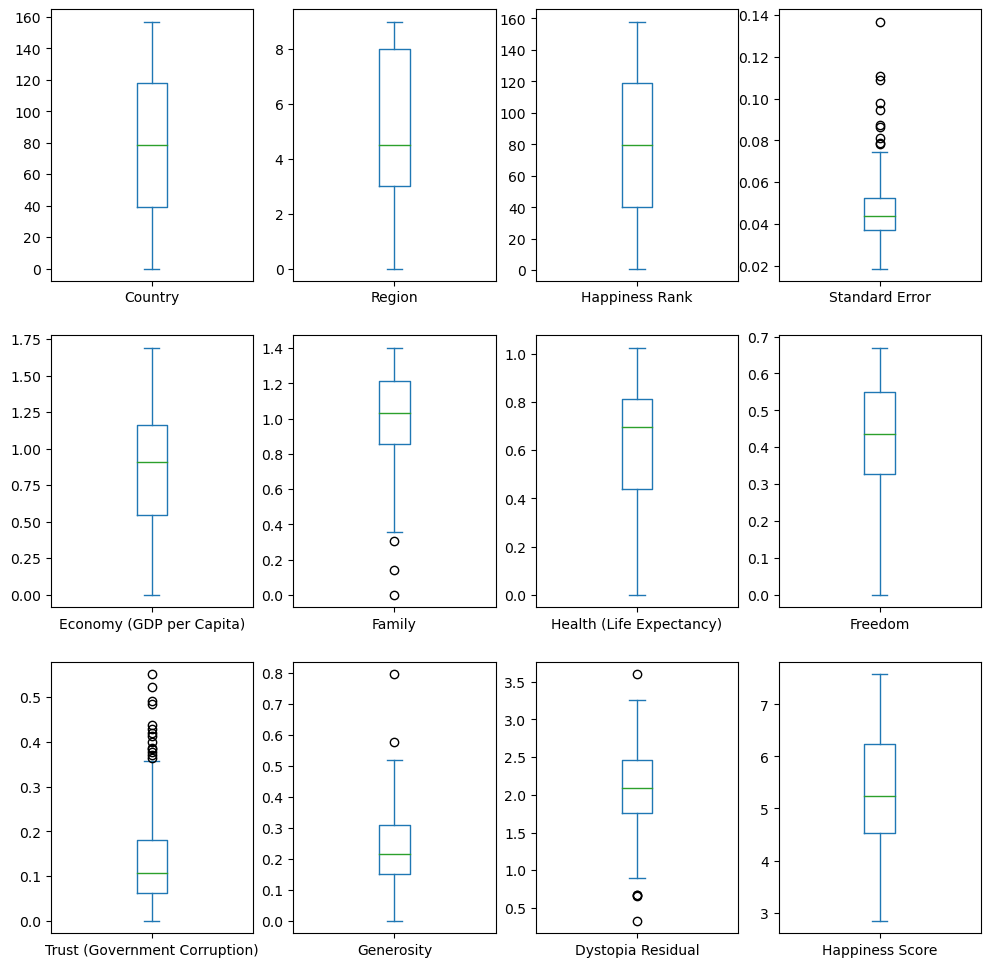

In [119]:
df.plot(kind='box',figsize=(12,12),layout=(3,4),subplots=True)

By using the Boxplot, it is showing that "Standard Error" & "Trust (Government Corruption)" are having the larger amount of Outliers

In [120]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

<AxesSubplot:ylabel='Frequency'>

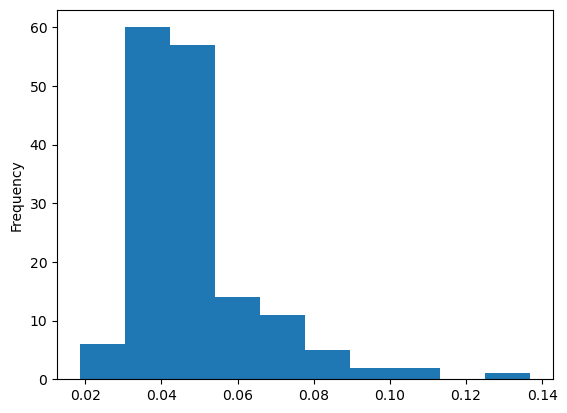

In [121]:
df['Standard Error'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

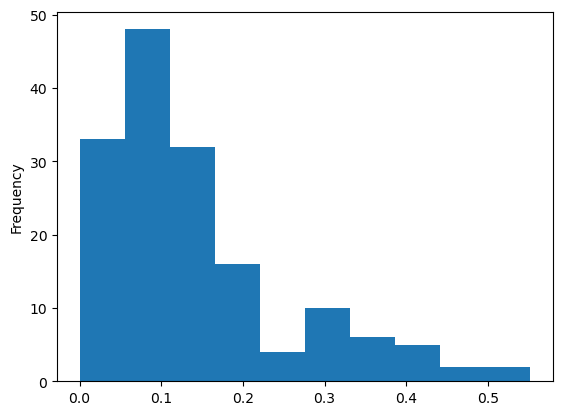

In [122]:
df['Trust (Government Corruption)'].plot.hist()

By using the Skewness Checking method and Histogram, it is showing that "Standard Error" & "Trust (Government Corruption)" are having also having Right Sided Skeness.

So by boxcox method, we are overcoming on the Skewness, which would effect to reduce the Outliers also.

In [123]:
df['Trust (Government Corruption)']=boxcox(df['Trust (Government Corruption)'],.5)

<AxesSubplot:>

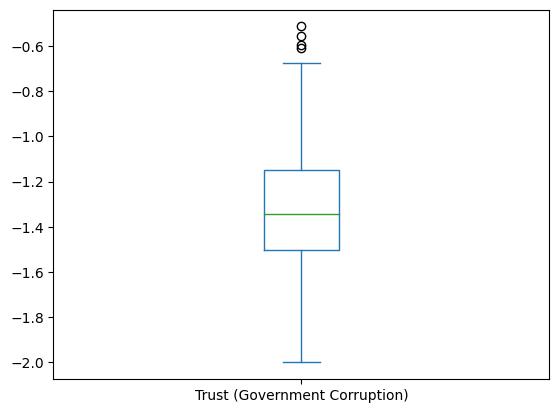

In [124]:
df['Trust (Government Corruption)'].plot.box()

<AxesSubplot:ylabel='Frequency'>

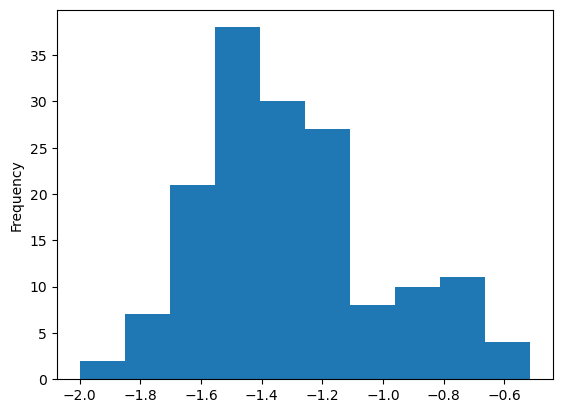

In [125]:
df['Trust (Government Corruption)'].plot.hist()

In [126]:
df['Standard Error']=boxcox(df['Standard Error'],.5)

<AxesSubplot:>

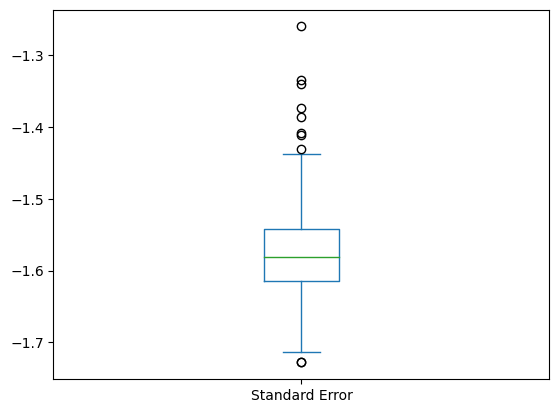

In [127]:
df['Standard Error'].plot.box()

<AxesSubplot:ylabel='Frequency'>

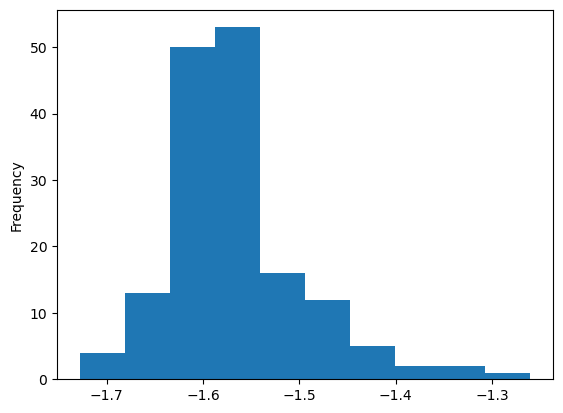

In [128]:
df['Standard Error'].plot.hist()

As the outliers are reduced, now absolute zscore method will eleminate less data beyond 3 standard deviation both side, so we will keep more enough data for our further ML predictions.

In [129]:
z=np.abs(zscore(df))
z

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.238770,1.300256,1.721000,0.875515,1.369621,1.320281,1.263408,1.577438,1.994534,0.471040,0.758258,1.937360
1,0.449465,1.300256,1.699075,0.142929,1.135226,1.514458,1.289434,1.332456,0.190088,1.575856,1.092857,1.914581
2,0.909893,1.300256,1.677149,0.938931,1.192861,1.361054,0.992229,1.469659,2.309792,0.824293,0.712335,1.884792
3,0.581016,1.300256,1.655224,0.530836,1.525130,1.251922,1.035145,1.605131,1.704241,0.868638,0.663893,1.880411
4,1.194920,0.040302,1.633299,0.768784,1.194876,1.221204,1.118054,1.360416,1.504447,1.748563,0.639337,1.797179
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,0.835423,1.552987,0.800520,0.818610,1.087740,2.625227,0.087228,2.588925,1.674055
154,1.436096,0.965117,1.655501,0.692695,1.392303,2.346860,1.263362,0.372033,0.427838,0.433117,0.843967,1.783571
155,1.260695,0.375441,1.677427,0.225513,0.455245,1.901086,0.372199,1.809238,0.579860,1.856891,3.208430,2.076199
156,1.260695,0.965117,1.699352,2.197472,2.067566,2.118467,1.649648,2.064472,0.200879,0.316950,0.481985,2.164688


In [130]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,1,-1.630622,1.39651,1.34951,0.94143,0.66557,-0.704191,0.29678,2.51738,7.587
1,58,9,2,-1.558005,1.30232,1.40223,0.94784,0.62877,-1.247803,0.43630,2.70201,7.561
2,37,9,3,-1.635144,1.32548,1.36058,0.87464,0.64938,-0.609216,0.34139,2.49204,7.527
3,105,9,4,-1.606046,1.45900,1.33095,0.88521,0.66973,-0.791646,0.34699,2.46531,7.522
4,24,5,5,-1.623012,1.32629,1.32261,0.90563,0.63297,-0.851836,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
151,20,8,152,-1.584115,0.25812,0.85188,0.27125,0.39493,-1.283564,0.21747,1.46494,3.587
152,0,7,153,-1.648774,0.31982,0.30285,0.30335,0.23414,-1.376494,0.36510,1.95210,3.575
153,118,8,154,-1.627764,0.22208,0.77370,0.42864,0.59201,-0.514187,0.22628,0.67042,3.465
154,13,8,155,-1.617587,0.28665,0.35386,0.31910,0.48450,-1.433961,0.18260,1.63328,3.340


In [131]:
df.shape

(158, 12)

In [132]:
cleaned_df.shape

(151, 12)

The uncleaned data was of 158 rows and the cleaned data is of 151 rows, so only 7 rows are eleminated due to outliers and we are having very good amount of data to train our Machine Learning Model.

In [133]:
x=cleaned_df.iloc[:,0:-1]

In [134]:
x.shape

(151, 11)

In [135]:
y=cleaned_df.iloc[:,-1]

In [136]:
y.shape

(151,)

In [137]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=43)

In [138]:
xtrain.shape

(105, 11)

In [139]:
ytrain.shape

(105,)

In [140]:
xtest.shape

(46, 11)

In [141]:
ytest.shape

(46,)

In [142]:
lr=LinearRegression()

In [143]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [144]:
pred1=lr.predict(xtest)
pred1

array([3.92029577, 7.54700116, 5.217961  , 4.36128361, 5.2727811 ,
       4.81261833, 4.74160324, 4.22697091, 5.14008816, 5.37511565,
       6.29176749, 6.88763087, 6.47144946, 7.22568052, 4.9010332 ,
       4.83430199, 6.98859594, 7.21036548, 4.3377242 , 4.00294267,
       6.31834932, 4.89418502, 7.57638015, 4.71882883, 4.54594517,
       5.85060078, 6.95156949, 3.93308384, 4.69850626, 6.329216  ,
       7.45431759, 7.28551749, 5.69385477, 3.85114259, 6.01704302,
       5.22017194, 5.5881101 , 5.62367613, 5.48802477, 4.78755205,
       5.56006239, 5.23937752, 4.57707293, 5.10835955, 5.83705198,
       6.82583037])

In [145]:
r2_score(ytest,pred1)

0.9991635877527877

By using the Linear Regression, we are having the best r2_score value of approximately 100%. So there is no need to try any other Algorithm for the ML training of this dataset.
And we are saving our above lr Model via pickle method.

In [146]:
pickle.dump(lr, open('lr_model', 'wb'))

In [147]:
model=pickle.load(open('lr_model', 'rb'))

In [148]:
pred_model=model.predict(xtest)

In [149]:
r2_score(ytest,pred_model)

0.9991635877527877

The r2_score of our test data is also the best of approximately 100%

In [150]:
train_model=model.predict(xtrain)

In [151]:
r2_score(ytrain,train_model)

0.9994942160403963

We have tried something different, by applied our model in our xtrain data and compared the Machine predictions with the ytrain data and got the same very best r2_score of 100% approximately.